## Importation ##

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle


## data ##

In [2]:
data = pd.read_csv("AI-ify/data/data.csv")
genre_data = pd.read_csv('AI-ify/data/data_by_genres.csv')
year_data = pd.read_csv('AI-ify/data/data_by_year.csv')

[0.0594 1921 0.982
 "['Sergei Rachmaninoff', 'James Levine', 'Berliner Philharmoniker']"
 0.279 831667 0.211 0 '4BJqT0PrAfrxzMOxytFOIz' 0.878 10 0.665 -20.096 1
 'Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve' 4
 '1921' 0.0366 80.954]


## Preprocessing ##

In [20]:
columns = ['valence', 'year', 'acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo']

df = pd.DataFrame(data, columns=columns)

df = df.drop(columns=['id', 'key', 'name', 'release_date', 'artists'], errors='ignore')

print(df)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = df.select_dtypes(include=['object']).columns
# 
# print(f"Numeric features: {numeric_features}")
# print(f"Categorical features: {categorical_features}")
# 
# # Créer des transformateurs pour les colonnes numériques et catégorielles
# numeric_transformer = StandardScaler()
# categorical_transformer = OneHotEncoder()
# 
# print(f"Numeric features: {numeric_features}")
# print(f"Categorical features: {categorical_features}")
# 
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])
# 
# print(preprocessor)
# 
# X = preprocessor.fit_transform(df)
# print(X)
# Compute the dissimilarity matrix
#dissimilarity_matrix = euclidean_distances(X)

#print(dissimilarity_matrix)

        valence  year  acousticness  danceability  duration_ms  energy  \
0        0.0594  1921       0.98200         0.279       831667   0.211   
1        0.9630  1921       0.73200         0.819       180533   0.341   
2        0.0394  1921       0.96100         0.328       500062   0.166   
3        0.1650  1921       0.96700         0.275       210000   0.309   
4        0.2530  1921       0.95700         0.418       166693   0.193   
...         ...   ...           ...           ...          ...     ...   
170648   0.6080  2020       0.08460         0.786       301714   0.808   
170649   0.7340  2020       0.20600         0.717       150654   0.753   
170650   0.6370  2020       0.10100         0.634       211280   0.858   
170651   0.1950  2020       0.00998         0.671       337147   0.623   
170652   0.6420  2020       0.13200         0.856       189507   0.721   

        explicit  instrumentalness  liveness  loudness  mode  popularity  \
0              0          0.878000 

## Variables ##

In [19]:
#X = preprocessor.fit_transform(df)
inertia = []
silhouette_scores = []
K = list(range(2, 11))
random_state = 42

X = shuffle(scaled_data, random_state=random_state)
X = X[0:5000]
print(X[0])

[ 1.44929811  0.00820901 -0.00562391  2.02458325  0.33396243  0.14426265
 -0.30395549  1.92995557 -0.78853194  0.77571907  0.64391197  0.11766429
 -0.08414217  0.32380054]


## Determine Optimal K ##

Determine Optimal K
value of k: 2
value of k: 3
value of k: 4
value of k: 5
value of k: 6
value of k: 7
value of k: 8
value of k: 9
value of k: 10


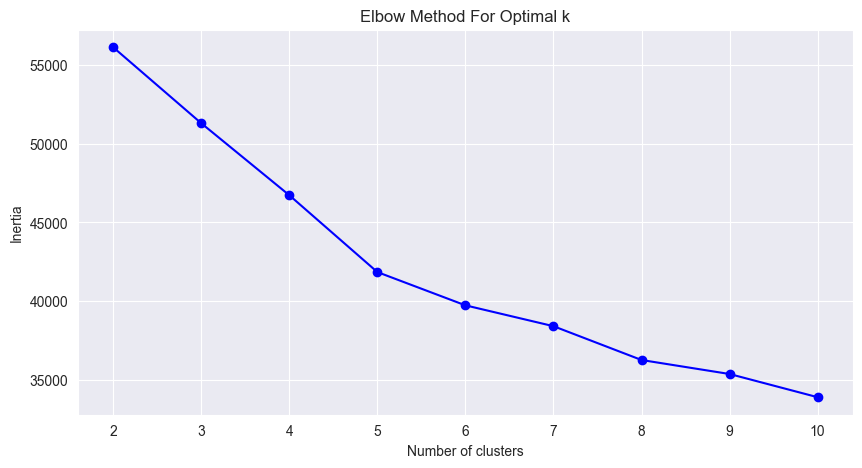

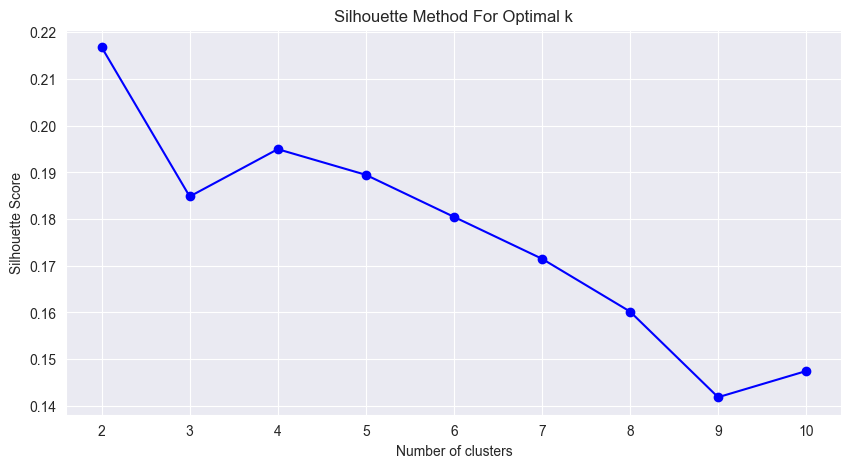

The optimal number of clusters is 2
[0 0 0 ... 1 1 1]


In [11]:
print("Determine Optimal K")
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    print(f"value of k: {k}")

#Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

#Plot the Silhouette Method
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()

# Determine the optimal number of clusters
optimal_k = K[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is {optimal_k}")

preprocessor = StandardScaler()

# Create a pipeline with the preprocessor and the optimal KMeans model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=optimal_k, random_state=42))
])

# Fit the pipeline to the data
pipeline.fit(df)

# Predict the clusters
clusters = pipeline.predict(df)
print(clusters)

## Sauvegarder la valeur de k ##

In [ ]:
with open('optimal_k.txt', 'w') as file:
    file.write(f"{4}")

## KMeans ##

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=random_state)
kmeans.fit(X)

## Ma valeur ##

In [21]:
my_value = np.array([[0.0594, 1921, 0.982,
 
 0.279, 831667, 0.211, 0, 0.878, 10, 0.665, -20.096,4,
  0.0366, 80.954]])

## Prediction ##

In [22]:
elements_in_cluster = []

In [23]:
def get_cluster_info(data_point):
    data_point = scaler.transform(data_point)
    
    clusters = kmeans.predict(X)
    # Predict the cluster for the given data point
    data_point_cluster = kmeans.predict([data_point])[0]
    
    # Get all elements in the same cluster
    elements_in_cluster = X[clusters == data_point_cluster]
    
    return data_point_cluster, elements_in_cluster

In [24]:
data_point = my_value
cluster, elements = get_cluster_info(data_point)
elements_in_cluster.append(elements)
print(f"The data point is in cluster {cluster}")
print(f"Elements in cluster {cluster}:\n{elements}")

C:\Users\Dorian\Documents\ESEO\E5e\IA\ProjetFinalSpotify\AI-ify\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Found array with dim 3. KMeans expected <= 2.